#**Classsificação de Roupas**

##**Definição do problema**

<div align = 'justify'><p>Nesse projeto, objetivamos desenvolver uma aplicação de Redes Neurais Convolucionais. Para isso, criaremos um classificador de roupas utilizando uma base de dados com 70000 imagens, sendo 60000 para treinamento e 10000 para teste.</p>
 <p>Cada imagem possui 28x28 em escala de cinza com valores na faixa de 0 a 255.  Sendo que 0 representa o preto e 255 representa o branco. Além disso, cada imagem é representada como uma linha de 784 posições.</p>
<p>Utilizaremos 10 targets class, sendo elas: T-SHIRT/TOP, TROUSER, PULLOVER, DRESS, COAT, SANDAL, SHIRT, SNEAKER, BAG E ANKLE BOOT.</p></div>

##**Resolução**

###**Etapa 1 - Importação das bibliotecas**

In [ ]:
# Verificação da versão do TensorFlow e importação das bibliotecas necessárias
%tensorflow_version 2.x
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
tf.__version__

'2.2.0'

###**Etapa 2 - Carregamento da base de dados**

In [ ]:
# Acessar arquivos do Google Drive
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
# Importação das base de dados de treinamento e de teste
fashion_train_df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Projeto #7: Classificação de roupas/fashion-mnist-train.csv', sep = ',')
fashion_test_df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Projeto #7: Classificação de roupas/fashion-mnist-test.csv', sep = ',')

###**Etapa 3 - Visualização dos dados**

In [ ]:
# Visualizar os 5 primeiros registros de fashion_train_df
fashion_train_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,...,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,0,0,105,92,101,107,100,132,0,0,2,4,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,150,...,211,220,214,74,0,255,222,128,0,0,0,0,0,0,0,0,0,44,12,0,0,40,134,162,191,214,163,146,165,79,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,0,114,183,112,55,23,72,102,165,160,28,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,24,188,163,93,...,171,249,207,197,202,45,0,3,0,0,0,0,0,0,0,0,0,0,1,0,0,0,22,21,25,69,52,45,74,39,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,0,0,0,46,0,21,68,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,25,187,189,...,230,237,229,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,68,116,112,136,147,144,121,102,63,0,0,0,0,0,0,0,0,0,0


In [ ]:
# Verificar o formato de fashion_train_df
fashion_train_df.shape

(60000, 785)

In [ ]:
# Criação das variáveis training e testing no formato de np.array
training = np.array(fashion_train_df, dtype = 'float32')
testing = np.array(fashion_test_df, dtype='float32')

In [ ]:
# Visualizar a variável training
training

array([[2., 0., 0., ..., 0., 0., 0.],
       [9., 0., 0., ..., 0., 0., 0.],
       [6., 0., 0., ..., 0., 0., 0.],
       ...,
       [8., 0., 0., ..., 0., 0., 0.],
       [8., 0., 0., ..., 0., 0., 0.],
       [7., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [ ]:
# Visualizar o formato de training
training.shape

(60000, 785)

Temos 60000 linhas e 785 colunas.

**Targets Class**

* 0 -> T-shirt/top
* 1 -> Trouser
* 2 -> Pullover
* 3 -> Dress
* 4 -> Coat
* 5 -> Sandal
* 6 -> Shirt
* 7 -> Sneaker
* 8 -> Bag
* 9 -> Ankle boot

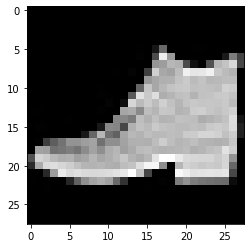

In [ ]:
# Sortear um número aleatório entre 1 e 60000
i = random.randint(1, 60000)

# Visualizar uma imagem aleatória da base de dados de treinamento
plt.imshow(training[i,1:].reshape((28,28)))

# Mostrar a imagem em escala de cinza
plt.imshow(training[i,1:].reshape((28,28)), cmap='gray');

In [ ]:
# Visualizar a classe da imagem mostrada acima
label = training[i,0]
label

9.0

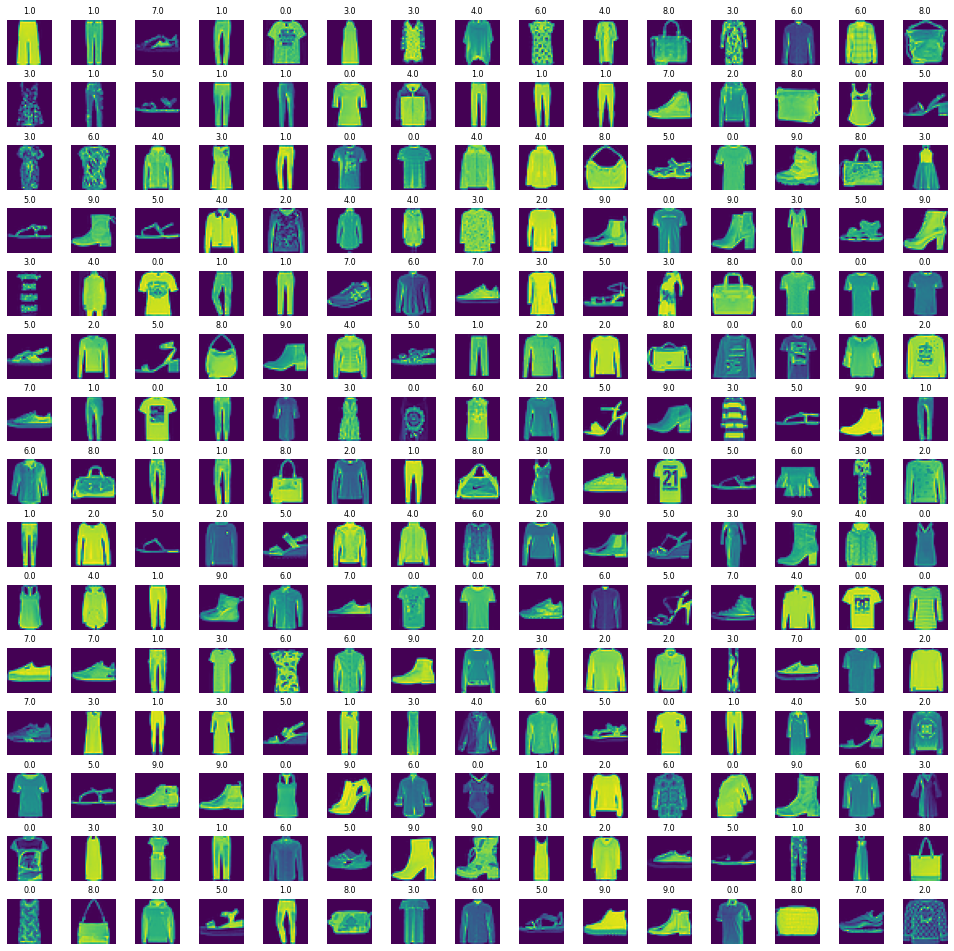

In [ ]:
# Definir dimensões para exibir as imagens em grid
W_grid = 15
L_grid = 15

# Criação dos subplots para exibir imagens com dimensão 17x17
fig, axes = plt.subplots(L_grid, W_grid, figsize = (17,17))

# Transformação do formato de matriz para vetor
axes = axes.ravel()

# Indicar o tamanho da base de dados de treinamento
n_training = len(training)

# Criação de variáveis espaçadas
for i in np.arange(0, W_grid * L_grid):
  
  # Sortear um número aleatório
  index = np.random.randint(0, n_training)
  
  # Mostrar imagem dentro do eixo
  axes[i].imshow(training[index,1:].reshape((28,28)))

  # Definir classe como título da imagem exibida
  axes[i].set_title(training[index,0], fontsize = 8)

  # Retirar informações dos eixos, mostrar somente as imagens
  axes[i].axis('off')

# Definir espaçamento horizontal  
plt.subplots_adjust(hspace=0.4)

In [ ]:
# Visualizar a quantidade de registros da variável training
n_training

60000

###**Etapa 4 - Tratamento da base de dados**

In [ ]:
# Atribuir a variável X somente as features previsoras (pixels) da base de dados de treinamento
X_train = training[:,1:] / 255

# Atribuir a variável y somente a feature da classe que desejamos prever da base de treinamento
y_train = training[:,0]

In [ ]:
# Atribuir a variável X somente as features previsoras (pixels) da base de dados de teste
X_test = testing[:,1:] / 255

# Atribuir a variável y somente a feature da classe que desejamos prever da base de teste
y_test = testing[:,0]

In [ ]:
# Visualizar estrutura de X_train
X_train.shape

(60000, 784)

Temos 60000 registros e 784 features previsoras.

In [ ]:
# Visualizar estrutura de y_train
y_train.shape

(60000,)

In [ ]:
# Visualizar os valores da primeira imagem
X_train[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

Note que temos os valores dos pixels na escala entre 0 e 1.

In [ ]:
# Transformar as imagens em formato de batch
# Nesse caso, como estamos trabalhando com imagem em escala de cinza, utilizamos 1 canal.
X_train = X_train.reshape(X_train.shape[0], *(28,28, 1))
X_test = X_test.reshape(X_test.shape[0], *(28,28, 1))

In [ ]:
# Visualizar a estrutura de X_train
X_train.shape

(60000, 28, 28, 1)

Para treinamento, temos 60000 imagens 28x28 com 1 canal.

In [ ]:
# Visualizar a estrutura de X_test
X_test.shape

(10000, 28, 28, 1)

Para teste, temos 10000 imagens 28x28 com 1 canal.

###**Etapa 5 - Construção e treinamento do modelo**

In [ ]:
# Criação de uma rede neural convolucional

# Importação de camadas e modelos do tensorflow.keras
from tensorflow.keras import layers, models

# Definir um modelo sequencial de camadas
cnn = models.Sequential()

# Primeira camada de convolucional
# 32 filtros de tamanho 3x3 (feature detector)
# Função de ativação RELU
# Valor de entrada (28, 28, 1)
cnn.add(layers.Conv2D(32, (3,3), activation = 'relu', input_shape=(28,28,1)))

# Camada de MaxPoolling com stride 2x2
cnn.add(layers.MaxPooling2D(2,2))

# Segunda camada de convolucional
# 64 filtros de tamanho 3x3 (feature detector)
# Função de ativação RELU
cnn.add(layers.Conv2D(64, (3,3), activation = 'relu'))

# Camada de MaxPoolling com stride 2x2
cnn.add(layers.MaxPooling2D(2,2))

# Terceira camada de convolucional
# 64 filtros de tamanho 3x3 (feature detector)
# Função de ativação REL
cnn.add(layers.Conv2D(64, (3,3), activation = 'relu'))

# Camada de Flattening (Transformação de uma matriz em um vetor)
cnn.add(layers.Flatten())

# Criação da rede neural densa

# Adicionar 64 neurônios
# Função de ativação RELU
cnn.add(layers.Dense(64, activation = 'relu'))

# Adicionar 10 neurônios
# Função de ativação Softmax
cnn.add(layers.Dense(10, activation = 'softmax'))

# Visualizar o sumário da rede neural criada
cnn.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten (Flatten)            (None, 576)               0         
_________________________________________________________________
dense (Dense)                (None, 64)                3

In [ ]:
# Compilação do modelo
# Função de custo 'sparse_categorical_crossentropy'
# Algoritmo de otimização 'Adam' (Gradiente Descendente Estocástico)
# Acurácia como métrica da avaliação do treinamento
cnn.compile(loss = 'sparse_categorical_crossentropy', optimizer='Adam',
            metrics = ['accuracy'])

In [ ]:
# Definir 150 épocas para treinamento
epochs = 150

# Treinamento do modelo
# Armazenar os resultados do treinamento na variável history
# Definir batch size em 512 (intervalo para o ajuste dos pesos).
history = cnn.fit(X_train, y_train, batch_size = 512, epochs = epochs)

Epoch 1/150
118/118 [==============================] - 1s 10ms/step - loss: 0.8996 - accuracy: 0.6838
Epoch 2/150
118/118 [==============================] - 1s 9ms/step - loss: 0.4936 - accuracy: 0.8173
Epoch 3/150
118/118 [==============================] - 1s 10ms/step - loss: 0.4152 - accuracy: 0.8500
Epoch 4/150
118/118 [==============================] - 1s 10ms/step - loss: 0.3765 - accuracy: 0.8652
Epoch 5/150
118/118 [==============================] - 1s 9ms/step - loss: 0.3533 - accuracy: 0.8731
Epoch 6/150
118/118 [==============================] - 1s 9ms/step - loss: 0.3243 - accuracy: 0.8840
Epoch 7/150
118/118 [==============================] - 1s 10ms/step - loss: 0.3108 - accuracy: 0.8875
Epoch 8/150
118/118 [==============================] - 1s 10ms/step - loss: 0.2959 - accuracy: 0.8934
Epoch 9/150
118/118 [==============================] - 1s 10ms/step - loss: 0.2845 - accuracy: 0.8989
Epoch 10/150
118/118 [==============================] - 1s 9ms/step - loss: 0.2722 - 

###**Etapa 6 - Avaliação do modelo**

In [ ]:
# Executar avaliação das previsões da RNA para os dados de teste (X_test e y_test). Para isso, utilizamos a função evaluate
evaluation = cnn.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.9065 - accuracy: 0.9158


In [ ]:
# Visualizar a variável evaluation
evaluation

[0.9064739942550659, 0.9157999753952026]

* **Valor de erro: 0.90** 
* **Acurácia: 0.91** 

In [ ]:
# Executar as previsões das classes para a base de dados de teste
predicted_classes = cnn.predict_classes(X_test)

In [ ]:
# Visualizar as classes previstas
predicted_classes

array([0, 1, 2, ..., 8, 8, 1])

In [ ]:
# Visualizar as classes da base de dados de teste (y_test)
y_test

array([0., 1., 2., ..., 8., 8., 1.], dtype=float32)

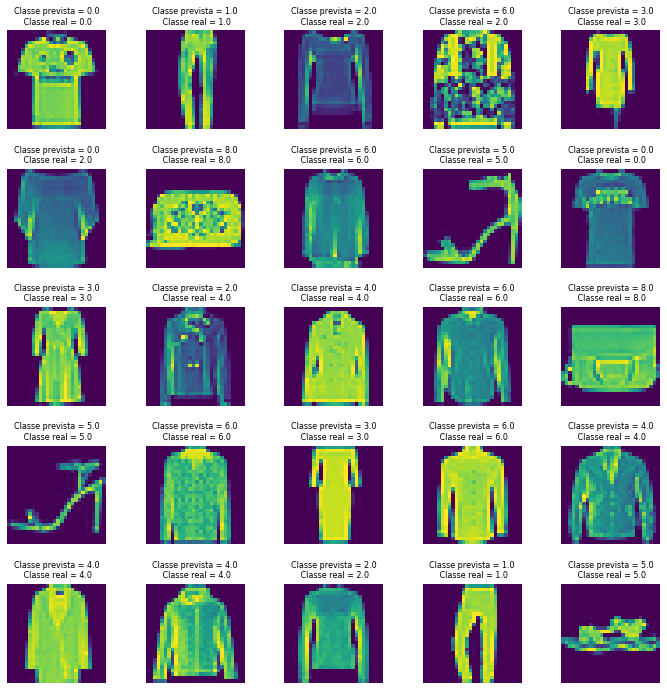

In [ ]:
# Visualização de 25 imagens previstas pelo modelo para fins de comparação entre a classe real e a classe prevista
W_grid = 5
L_grid = 5
fig, axes = plt.subplots(L_grid, W_grid, figsize = (12,12))
axes = axes.ravel()

for i in np.arange(0, W_grid * L_grid):
  axes[i].imshow(X_test[i].reshape((28,28)))
  axes[i].set_title("Classe prevista = {:0.1f}\n Classe real = {:0.1f}".format(predicted_classes[i], y_test[i]), fontsize = 8)
  axes[i].axis('off')
plt.subplots_adjust(hspace=0.4)

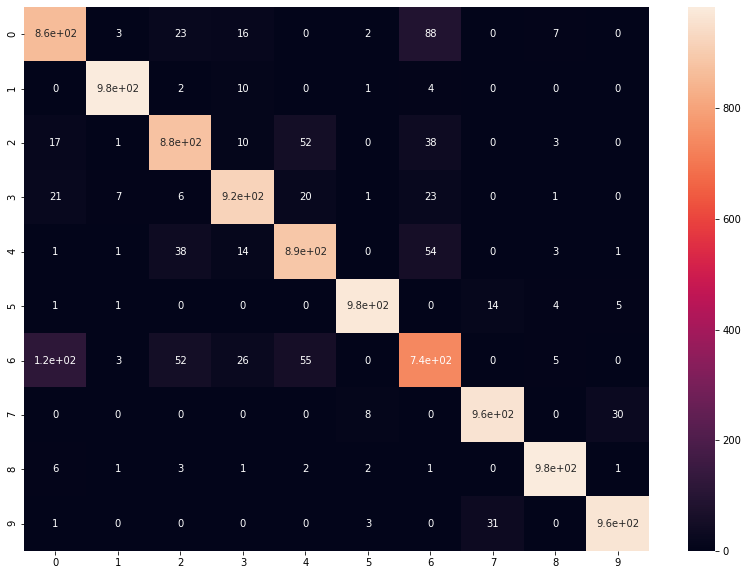

In [ ]:
# Importação da matriz de confusão
from sklearn.metrics import confusion_matrix

# Criação da matriz de confusão do modelo
cm = confusion_matrix(y_test, predicted_classes)

# Visualizar a matriz de confusão através de um Heatmap
plt.figure(figsize = (14,10))
sns.heatmap(cm, annot=True);

In [ ]:
# Visualizar valores da matriz de confusão
cm

array([[861,   3,  23,  16,   0,   2,  88,   0,   7,   0],
       [  0, 983,   2,  10,   0,   1,   4,   0,   0,   0],
       [ 17,   1, 879,  10,  52,   0,  38,   0,   3,   0],
       [ 21,   7,   6, 921,  20,   1,  23,   0,   1,   0],
       [  1,   1,  38,  14, 888,   0,  54,   0,   3,   1],
       [  1,   1,   0,   0,   0, 975,   0,  14,   4,   5],
       [118,   3,  52,  26,  55,   0, 741,   0,   5,   0],
       [  0,   0,   0,   0,   0,   8,   0, 962,   0,  30],
       [  6,   1,   3,   1,   2,   2,   1,   0, 983,   1],
       [  1,   0,   0,   0,   0,   3,   0,  31,   0, 965]])

In [ ]:
# Importação das métricas de avaliação
from sklearn.metrics import classification_report

# Definir o conjunto de classes do modelo
num_classes = 10
target_names = ["Classe {}".format(i) for i in range(num_classes)]
target_names

['Classe 0',
 'Classe 1',
 'Classe 2',
 'Classe 3',
 'Classe 4',
 'Classe 5',
 'Classe 6',
 'Classe 7',
 'Classe 8',
 'Classe 9']

In [ ]:
# Visualizar as métricas de avaliação para cada classe do modelo
print(classification_report(y_test, predicted_classes, target_names=target_names))

              precision    recall  f1-score   support

    Classe 0       0.84      0.86      0.85      1000
    Classe 1       0.98      0.98      0.98      1000
    Classe 2       0.88      0.88      0.88      1000
    Classe 3       0.92      0.92      0.92      1000
    Classe 4       0.87      0.89      0.88      1000
    Classe 5       0.98      0.97      0.98      1000
    Classe 6       0.78      0.74      0.76      1000
    Classe 7       0.96      0.96      0.96      1000
    Classe 8       0.98      0.98      0.98      1000
    Classe 9       0.96      0.96      0.96      1000

    accuracy                           0.92     10000
   macro avg       0.92      0.92      0.92     10000
weighted avg       0.92      0.92      0.92     10000

